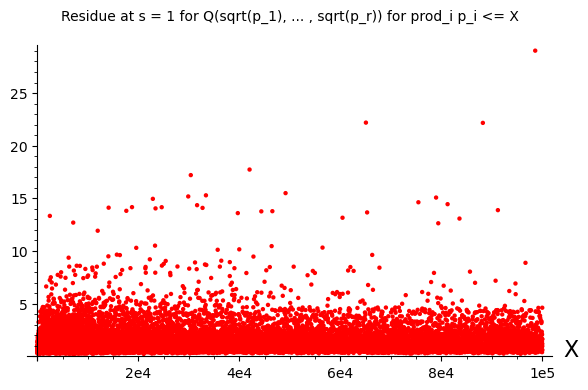

[(2, 0.623225240140549), (3, 0.691785618219382), (5, 0.604660059134379), (6, 0.564365818525370), (7, 0.660783631771255), (10, 0.602069890137045), (11, 0.644987140825695), (13, 0.647205672106664), (14, 0.641142859696078), (15, 0.611899874054605), (17, 0.648643961308035), (19, 0.706027785529447), (21, 0.693570524808106), (22, 0.695219638472463), (23, 0.702679039271806), (26, 0.682175765550780), (29, 0.678034031669082), (30, 0.655023484053268), (31, 0.696357245873669), (33, 0.707267998208169), (34, 0.717528616262963), (35, 0.702063393368595), (37, 0.707160296644911), (38, 0.701939880249070), (39, 0.699112557874183), (41, 0.722188731093494), (42, 0.706175080321156), (43, 0.729146863695972), (46, 0.731605582665527), (47, 0.729410822583373), (51, 0.738022538440202), (53, 0.731835113648404), (55, 0.726107133942804), (57, 0.749989232175861), (58, 0.743689403333202), (59, 0.748223002877219), (61, 0.753360494644044), (62, 0.748044439295897), (65, 0.738939008463111), (66, 0.740827040338195), (67,

[a == 0.2282084587676654, b == 0.767801047806015]

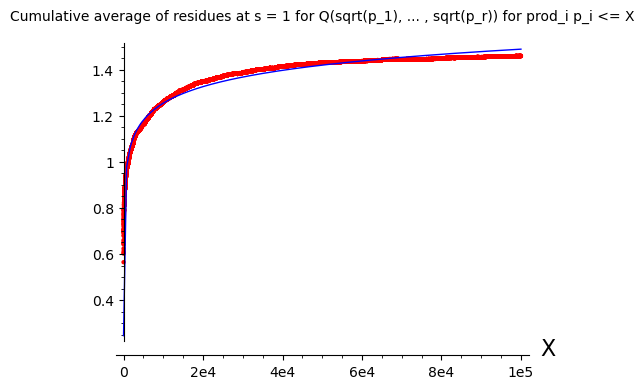

In [3]:
RESIDUE_FILE = "/home/abhijitm/research/nt/matschke_elliptic/egr/code/residues_maxD_100000.sobj"

df = load(RESIDUE_FILE)
cum_sum = 0.0
residues = []
residue_avgs = []
count = 0
for m, residue in list(df.items()):
    count += 1
    cum_sum += residue
    residues.append((m, residue))
    residue_avgs.append((m, cum_sum/count))

plt = plot([])
plt += list_plot(residues, color = 'red', title = "Residue at s = 1 for Q(sqrt(p_1), ... , sqrt(p_r)) for prod_i p_i <= X", axes_labels = ['X', ""])
show(plt)

print(residue_avgs[0:50])
var('a','b')
model(x) = a*(log(x))^b
sol = find_fit(residue_avgs, model)
show(sol)
g(x) = model(a = sol[0].rhs(), b = sol[1].rhs())

plt = plot([])
plt += plot(g(x), x, [3,100000], color = 'blue')
plt += list_plot(residue_avgs, color = 'red', title = "Cumulative average of residues at s = 1 for Q(sqrt(p_1), ... , sqrt(p_r)) for prod_i p_i <= X", axes_labels = ['X',""])
show(plt)



In [19]:
from tqdm import tqdm

N = 1000000


ubs = []
cum_ub_sum = 0.0
ub_avgs = []
count = 0

num_factors = [0]*(N+1)
for p in Primes():
    if p > N:
        break
    else:
        for j in range(1,ceil(N/p)):
            num_factors[p*j] += 1

for m in tqdm(range(2,N)):
    if is_squarefree(m) is True:
        count += 1
        w = num_factors[m]
        ub = float((w*ln(2*m)/((2**w)*e*(2**w - 1)))**(2**w-1))
        cum_ub_sum += ub
        ubs.append((m,ub))
        ub_avgs.append((m, cum_ub_sum/count))


plt = plot([])
plt += list_plot(ubs, color = 'red')
show(plt)

g 
var('a','b')
model(x) = a*x^b
sol = find_fit(ub_avgs, model)
show(sol)
g(x) = model(a = sol[0].rhs(), b = sol[1].rhs())

plt = plot([])
plt += plot(g(x), x, [1,N], color = 'blue')
plt += list_plot(ub_avgs, color = 'red')
show(plt)


 36%|███▋      | 363483/999998 [00:20<00:35, 17782.03it/s]


KeyboardInterrupt: 

100%|██████████| 249998/249998 [00:08<00:00, 30516.82it/s]


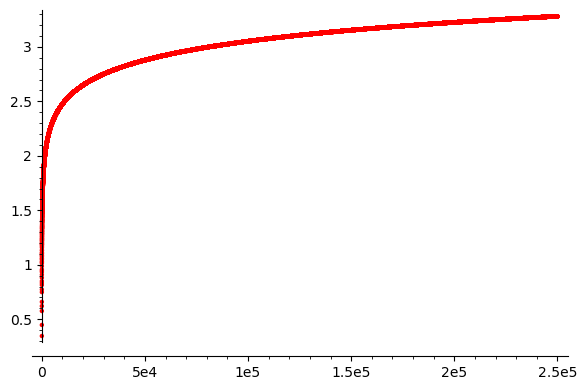

In [17]:
from tqdm import tqdm

N = 250000

ubs = []

w = 3
for m in tqdm(range(2,N)):
    if is_squarefree(m) is True:
        ub = float((w*ln(2*m)/(e*(2**w - 1)))**(2**w-1))
        ubs.append((m,ub))


plt = plot([])
plt += list_plot(ubs, color = 'red')
show(plt)


